# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Data Preprocessing 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Building CNN Model & Pretraining Model
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

# Downlaod Model
import pickle

# Reading Data(Image)

In [2]:
path_folder = "New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train"
class_name = os.listdir(path_folder)
class_name.sort()
class_name = class_name[:4] + class_name[20:23]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (100, 100))
        
        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
Loading Folder -- Apple___Apple_scab  The Count of Classes ==>  0
Loading Folder -- Apple___Black_rot  The Count of Classes ==>  1
Loading Folder -- Apple___Cedar_apple_rust  The Count of Classes ==>  2
Loading Folder -- Apple___healthy  The Count of Classes ==>  3
Loading Folder -- Potato___Early_blight  The Count of Classes ==>  4
Loading Folder -- Potato___Late_blight  The Count of Classes ==>  5
Loading Folder -- Potato___healthy  The Count of Classes ==>  6
---- Done ----------- 


# Preprocessing Data & Visualization

In [3]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [4]:
print(data.shape)

(13473, 100, 100, 3)


## Transform Label To One Hot Encoder

In [5]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Shuffle Data

In [6]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10778, 100, 100, 3), (10778, 7), (2695, 100, 100, 3), (2695, 7))

# Visualization Some Data

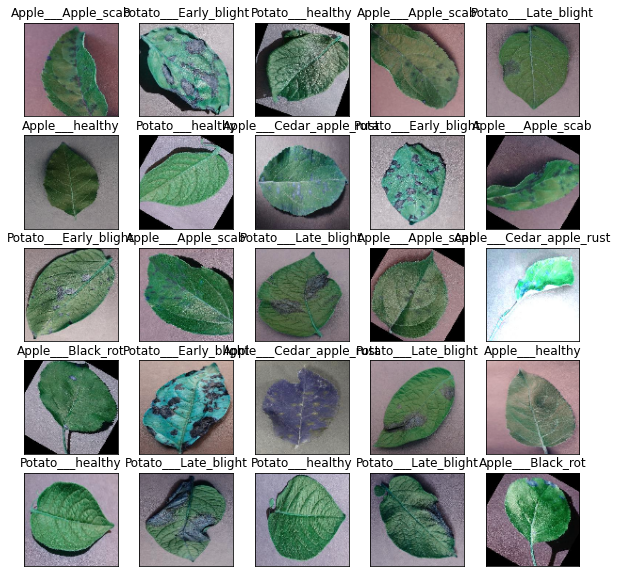

In [8]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

# Building CNN Model

In [9]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(7, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 average_pooling2d (AverageP  (None, 50, 50, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 average_pooling2d_1 (Averag  (None, 25, 25, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 64)       0

In [10]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/50
337/337 [==============================] - 114s 328ms/step - loss: 1.4397 - accuracy: 0.4466 - val_loss: 0.7892 - val_accuracy: 0.7058
Epoch 2/50
337/337 [==============================] - 111s 331ms/step - loss: 0.8382 - accuracy: 0.7053 - val_loss: 0.4698 - val_accuracy: 0.8453
Epoch 3/50
337/337 [==============================] - 109s 324ms/step - loss: 0.5870 - accuracy: 0.7961 - val_loss: 0.3346 - val_accuracy: 0.8820
Epoch 4/50
337/337 [==============================] - 108s 321ms/step - loss: 0.4550 - accuracy: 0.8492 - val_loss: 0.2864 - val_accuracy: 0.9050
Epoch 5/50
337/337 [==============================] - 110s 326ms/step - loss: 0.3561 - accuracy: 0.8856 - val_loss: 0.1824 - val_accuracy: 0.9358
Epoch 6/50
337/337 [==============================] - 108s 320ms/step - loss: 0.3165 - accuracy: 0.8969 - val_loss: 0.2103 - val_accuracy: 0.9258
Epoch 7/50
337/337 [==============================] - 107s 316ms/step - loss: 0.2679 - accuracy: 0.9134 - val_loss: 0.1875 -

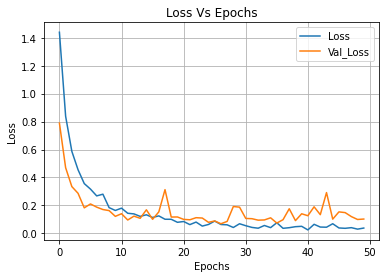

In [11]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.title("Loss Vs Epochs")

plt.legend()
plt.grid()

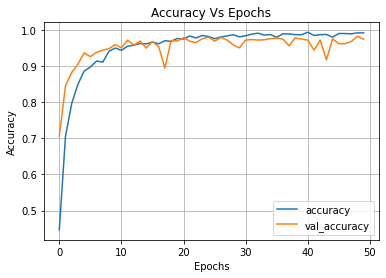

In [12]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.title("Accuracy Vs Epochs")

plt.legend()
plt.grid()

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"The Accuracy Testing Data is ==> {accuracy} %")
print(f"The loss Testing Data is ==> {loss}")


85/85 [==============================] - 12s 136ms/step - loss: 0.1021 - accuracy: 0.9737
The Accuracy Testing Data is ==> 0.9736549258232117 %
The loss Testing Data is ==> 0.10214235633611679


# System Prediction

1/1 [==============================] - 0s 189ms/step
Type Of Planet ==> Apple
Type Disease Of Planet ==> Black_rot


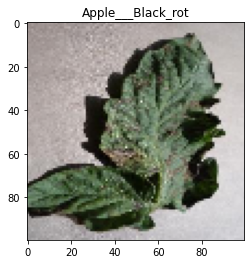

In [26]:
path_img1 = "test\\test\\TomatoEarlyBlight5.JPG"
image = cv2.imread(path_img1)
image = cv2.resize(image, (100, 100))  # Resize the image to match the model's input shape
new_image = np.reshape(image, [1, 100, 100, 3])

# ================== Show Prediction =================================
prediction = model.predict(new_image)[0]

# Print the prediction
new_prediction = class_name[np.argmax(prediction)]
print("Type Of Planet ==>", new_prediction[:new_prediction.index("__")])
print("Type Disease Of Planet ==>", new_prediction[new_prediction.index("__")+3:])

# ================== Show image And Label Prediction =================================
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction)
plt.show()


# Show Prediction

In [15]:
# path_test ="D:\\plant disease\\test\\test\\AppleCedarRust2.JPG"
# image_testing = []
# label_testing = []
# for img in os.listdir(path_test):
#     image = path_test + "\\" + img
#     image = cv2.imread(image)
#     new_image = cv2.resize(image, (224, 224))
#     image_testing.append(new_image)
#     label_testing.append(img[:-5])

# image_testing = np.array(image_testing)
# label_testing = np.array(label_testing)

# plt.figure(figsize=(10, 10))
# for i in range(12):
#     plt.subplot(6, 2, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     new_image = np.resize(image_testing[i], [1, 224, 224, 3])
#     prediction = model.predict(new_image)
#     prediction = prediction[0]
#     print(prediction)
#     plt.imshow(image_testing[i])
#     plt.title(f"The Real Prediction is {label_testing[i]} \n The model Prediction is {class_name[np.argmax(prediction)]}")

In [16]:
# pickle.dump(model, open("/kaggle/working/Prototype-Green Hackathon_model1.bin", "wb"))
# model.save('Prototype-Green Hackathon_model.hin')

85/85 [==============================] - 14s 140ms/step


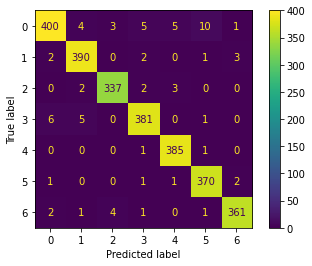

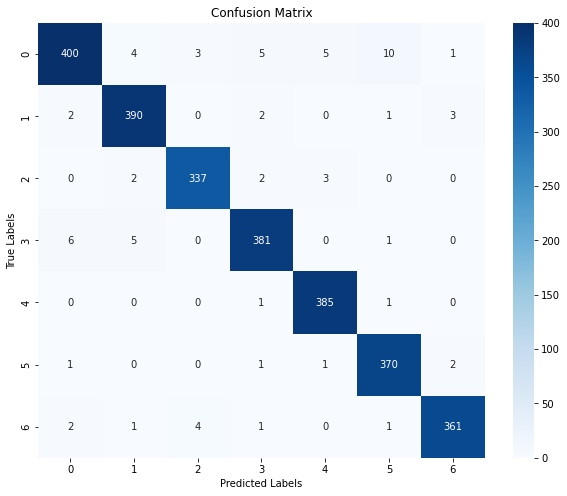

In [17]:
# import os
# import cv2
# import numpy as np
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Path to the directory containing your test images
# path_test = "D:\\plant disease\\test\\test"

# # Lists to store images and their labels
# image_testing = []
# label_testing = []

# # Loop through the test images and preprocess them
# for img in os.listdir(path_test):
#     image = os.path.join(path_test, img)
#     image = cv2.imread(image)
#     image = cv2.resize(image, (100, 100))  # Resize the image to match the model's input shape
#     image_testing.append(image)
#     label_testing.append(img[:-5])

# # Convert lists to NumPy arrays
# image_testing = np.array(image_testing)
# label_testing = np.array(label_testing)

# # Make predictions for all test images
# predictions = model.predict(image_testing)

# # Convert predictions and ground truth labels to class indices
# predicted_class_indices = np.argmax(predictions, axis=1)
# true_class_indices = [class_name.index(label) for label in label_testing]

# # # Calculate the confusion matrix
# # confusion_mtx = confusion_matrix(true_class_indices, predicted_class_indices)

# # # Define class labels
# # class_labels = class_name

# # # Plot the confusion matrix as a heatmap
# # plt.figure(figsize=(10, 8))
# # sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# # plt.xlabel('Predicted')
# # plt.ylabel('True')
# # plt.title('Confusion Matrix')
# # plt.show()

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx)
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


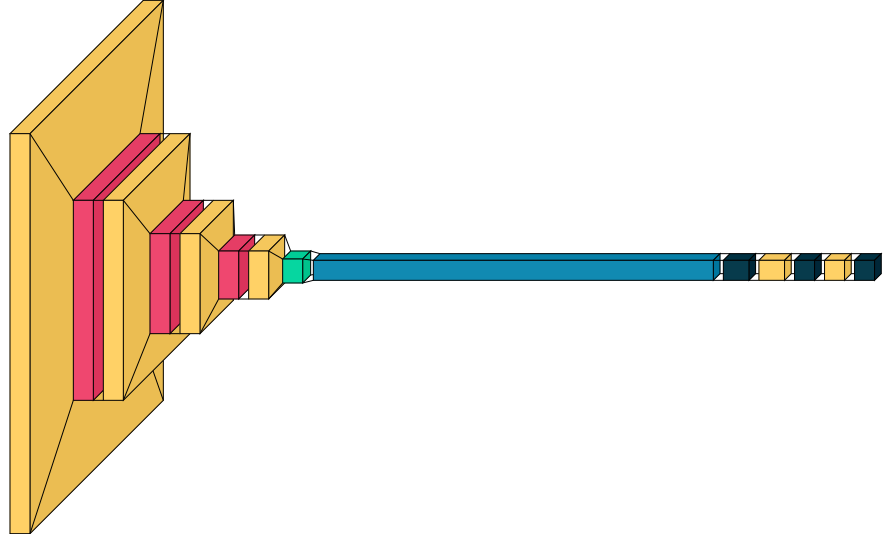

In [18]:
import visualkeras
visualkeras.layered_view(model)